# Comparing train and test errors

https://esciencecenter-digital-skills.github.io/scikit-learn-mooc/overfit/learning_validation_curves_slides.html




## quantify trade-off between over- and underfitting by comparing train and test errors
- validation curves -> varying complexity
- learning curves -> varying sample size

train vs test error: increasing complexity
- degree 2 poly -> train and test error goes down. fits both sets fine
- degree 5 poly -> train error still decreases, but test error increases. memorizes noise (for instance at the very right of the figure)
- degree 9 poly -> memorization gets extreme

learning curvies: varying sample size
- fix parameters of the model, and vary the sample size
- degree 9 poly from before
- with small data set, big gap between train and test error
- with larger sample, teh function get smoother -- the noise is smoothed out
- if we have enough samples, train and test errors converge. in this case, this is the case because the degree 9 poly is the correct data generating process.
- in general, there are decreasing returns to sample size: irreducible error (holding N params fixed!!)

*complexity* is captured through different parameters in different families
- polynomial vs decision tree
- different "inductive bias": shape of the prediction function that one model favors vs another shape. example: tree is piecewise linear, polynomial is smoother (no kinks).
- for many families, we can go from complex to simpler variants. this is called regularization.

# Exercise: Validation and learning curves

#### Train and test SVM classifier (15 min,  2 people) 

The aim of this exercise is to:
* train and test a support vector machine classifier through cross-validation;
* study the effect of the parameter gamma (one of the parameters controlling under/over-fitting in SVM) using a validation curve;
* determine the usefulness of adding new samples in the dataset when building a classifier using a learning curve. 

We will use blood transfusion dataset located in `../datasets/blood_transfusion.csv`. First take a data exploration to get familiar with the data.

You can then start off by creating a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Script below will help you get started:

```python=
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())
```

You can vary gamma between 10e-3 and 10e2 by generating samples on a logarithmic scale with the help of

```python=
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
```

To manipulate training size you could use:

```python=
train_sizes = np.linspace(0.1, 1, num=10)
```


## Solution

SVM is similar to logistic regression. Flexibilty increases in the kernal size that makes the model non-linear.

In [17]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())

In [19]:
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"

In [28]:
train_sizes = np.linspace(0.1, 1, num=10)


Short look at the dataset - normally we should do this more systematically

In [39]:
data.describe()

,Recency,Frequency,Monetary,Time
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [40]:
target.describe()

count             748
unique              2
top       not donated
freq              570
Name: Class, dtype: object

### (1) simple training/evaluation run

In [36]:
from sklearn.model_selection import cross_validate, ShuffleSplit

# use shuffle split for lower errors in the figures
cv = ShuffleSplit(random_state=0)
cv_result = cross_validate(model, data, target, cv=cv)
cv_result["test_score"].mean()

0.7653333333333334

### (2) validation curve: effect of flexibility

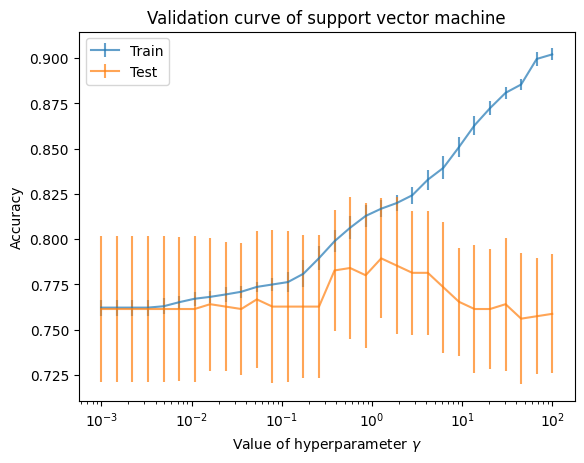

In [37]:
# solution
import numpy as np

from sklearn.model_selection import ValidationCurveDisplay

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name=param_name,
    param_range=gammas,
    cv=cv,
    scoring="accuracy",  # this is already the default for classifiers
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  # transparency for better visualization
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel=r"Value of hyperparameter $\gamma$",
    title="Validation curve of support vector machine",
)

Results
- test accuracy starts decreasing aroudn $gamma>1$: overfitting
- before, no clearly "best" flexibility; test error flat

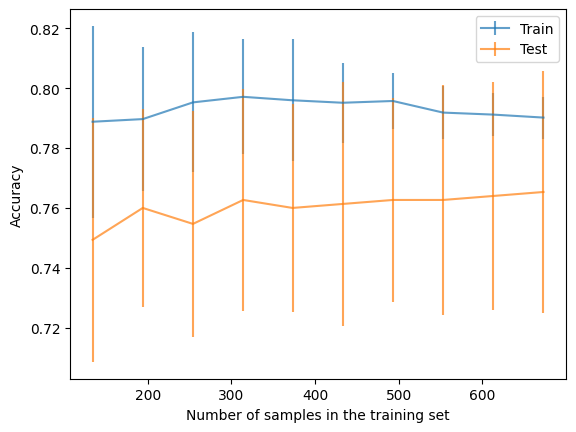

In [38]:
# solution
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",
    scoring="accuracy",  # this is already the default for classifiers
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  # transparency for better visualization
    n_jobs=2,
)

_ = disp.ax_.set(title="Learning curve for support vector machine")

Results
- adding new samples does not improve training and testing scores
- why? features are useless, or we are using the wrong hyperparameters in the support vector machine

### (3) training curve: effect of sample size


### Quiz: over- and underfitting and learning curves (5 minutes, in pairs; if time-permitting) [Flavio]


**1. A model is overfitting when:**
- a) both the train and test errors are high
- b) train error is low but test error is high
- c) train error is high but the test error is low
- d) both train and test errors are low

*select a single answer*

**2. Assuming that we have a dataset with little noise, a model is underfitting when:**
- a) both the train and test errors are high
- b) train error is low but test error is high
- c) train error is high but the test error is low
- d) both train and test errors are low

*select a single answer*


**3. For a fixed training set, by sequentially adding parameters to give more flexibility to the model, we are more likely to observe:**
- a) a wider difference between train and test errors
- b) a reduction in the difference between train and test errors
- c) an increased or steady train error
- d) a decrease in the train error

*Select all answers that apply*

**4. For a fixed choice of model parameters, if we increase the number of labeled observations in the training set, are we more likely to observe:**
- a) a wider difference between train and test errors
- b) a reduction in the difference between train and test errors
- c) an increased or steady train error
- d) a decrease in the train error

*Select all answers that apply*

**5. Polynomial models with a high degree parameter:**
- a) always have the best test error (but can be slow to train)
- b) underfit more than linear regression models
- c) get lower training error than lower degree polynomial models
- d) are more likely to overfit than lower degree polynomial models

*Select all answers that apply*

**6. If we chose the parameters of a model to get the best overfitting/underfitting tradeoff, we will always get a zero test error.**
- a) True
- b) False

*Select a single answer*
